# IMPORT LIBRARIES

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from scipy import stats
from sklearn.model_selection import train_test_split
from statistics import LinearRegression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASETS

In [5]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [6]:
train_df

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.00,950.0,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6395,6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0,219.0
6396,6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0,30.0
6397,6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0,159.0
6398,6398,210.0,110.0,190.0,0.230,47.0,7.900,120.0,1400.0,140.00,800.0,470.0


In [7]:
test_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,7200.000000,168.832299,55.668958,51.481462,0.349397,62.757297,3.423275,77.886431,659.276702,75.164221,409.850094
std,462.313206,82.953613,41.717342,77.520902,0.551632,1724.080876,4.968633,780.983717,620.275872,121.649147,271.134286
min,6400.000000,9.400000,0.260000,0.460000,0.000000,0.064000,0.004740,2.200000,66.000000,0.390000,29.000000
25%,6800.000000,110.000000,26.000000,12.000000,0.140000,7.800000,0.770000,21.000000,351.000000,13.100000,230.000000
50%,7200.000000,160.000000,46.200000,31.000000,0.210000,15.000000,2.000000,35.000000,530.000000,34.000000,330.000000
75%,7600.000000,210.000000,74.000000,63.000000,0.380000,25.000000,4.300000,61.000000,815.000000,94.600000,510.000000
max,8000.000000,700.000000,460.000000,1300.000000,9.900000,69000.000000,58.200000,27400.000000,17400.000000,2100.000000,2300.000000


# DATA PREP

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


In [9]:
train_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


## Drop Unused Features

In [10]:
train_df = train_df.drop(columns=['id'])

## Handle Null Values

In [11]:
train_df.isnull().sum()

Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
Hardness                  0
dtype: int64

# FEATURE ENGINEERING

## CORRELATION HEATMAP

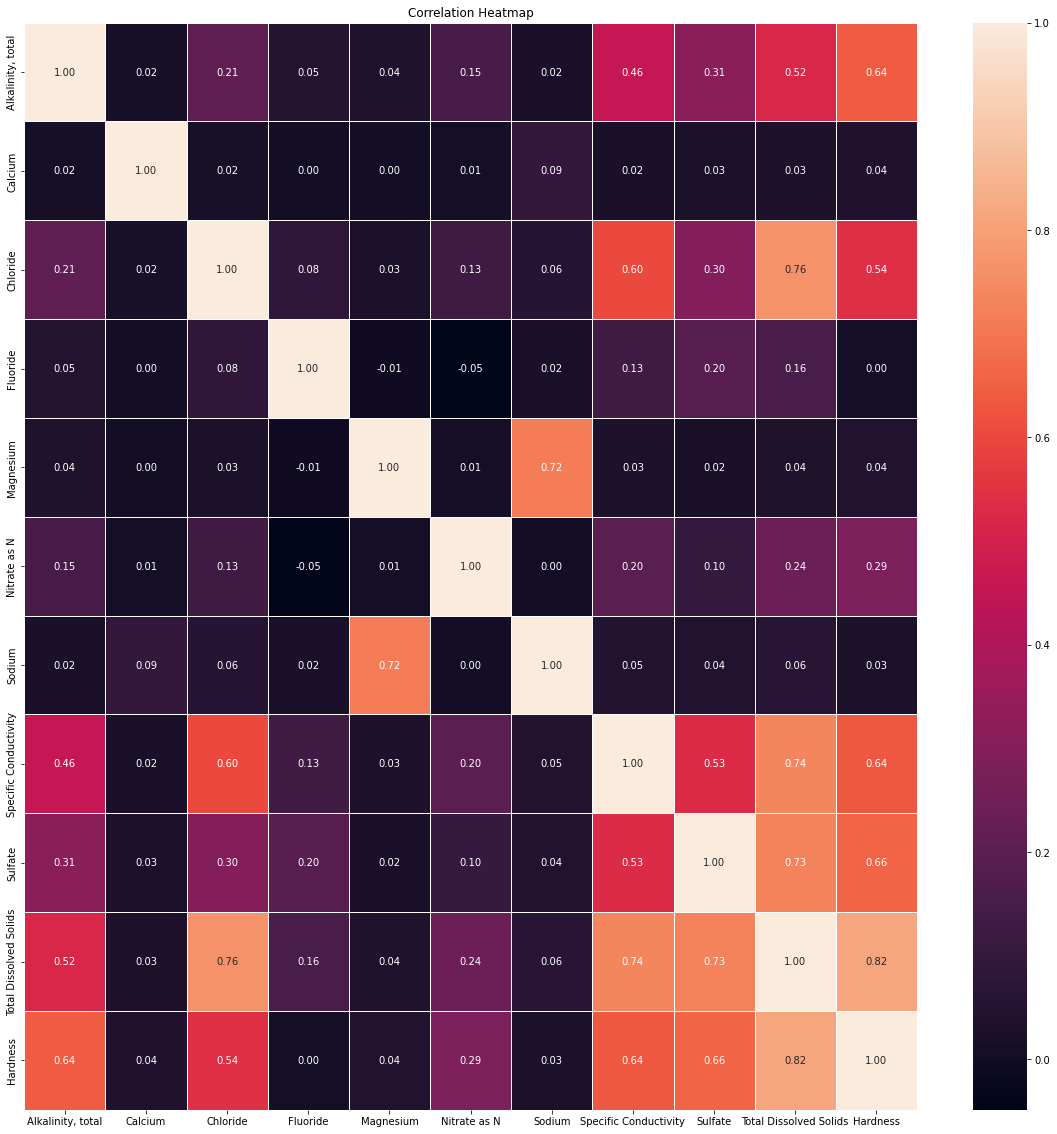

In [12]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## FEATURE CREATION

In [13]:
def feat_eng(df):
    dfCopy = df.copy()
    dfCopy["CaMg_Interaction"] = dfCopy["Calcium"] * 2.5 + dfCopy["Magnesium"] * 4
    dfCopy["AlkalinMg_Interaction"] = dfCopy["Alkalinity, total"] * dfCopy["Magnesium"]
    dfCopy["AlkalinCa_Interaction"] = dfCopy["Alkalinity, total"] * dfCopy["Calcium"]
    dfCopy["NaMg_Interaction"] = dfCopy["Sodium"] * dfCopy["Magnesium"]
    dfCopy["Total_Cation"] = dfCopy["Sodium"] + dfCopy["Magnesium"] + dfCopy["Calcium"]
    dfCopy["Total_Anion"] = dfCopy["Chloride"] + dfCopy["Sulfate"] + dfCopy["Nitrate as N"] + dfCopy["Fluoride"]
    return dfCopy

In [14]:
new_train_df = feat_eng(train_df)

## FEATURE SELECTION

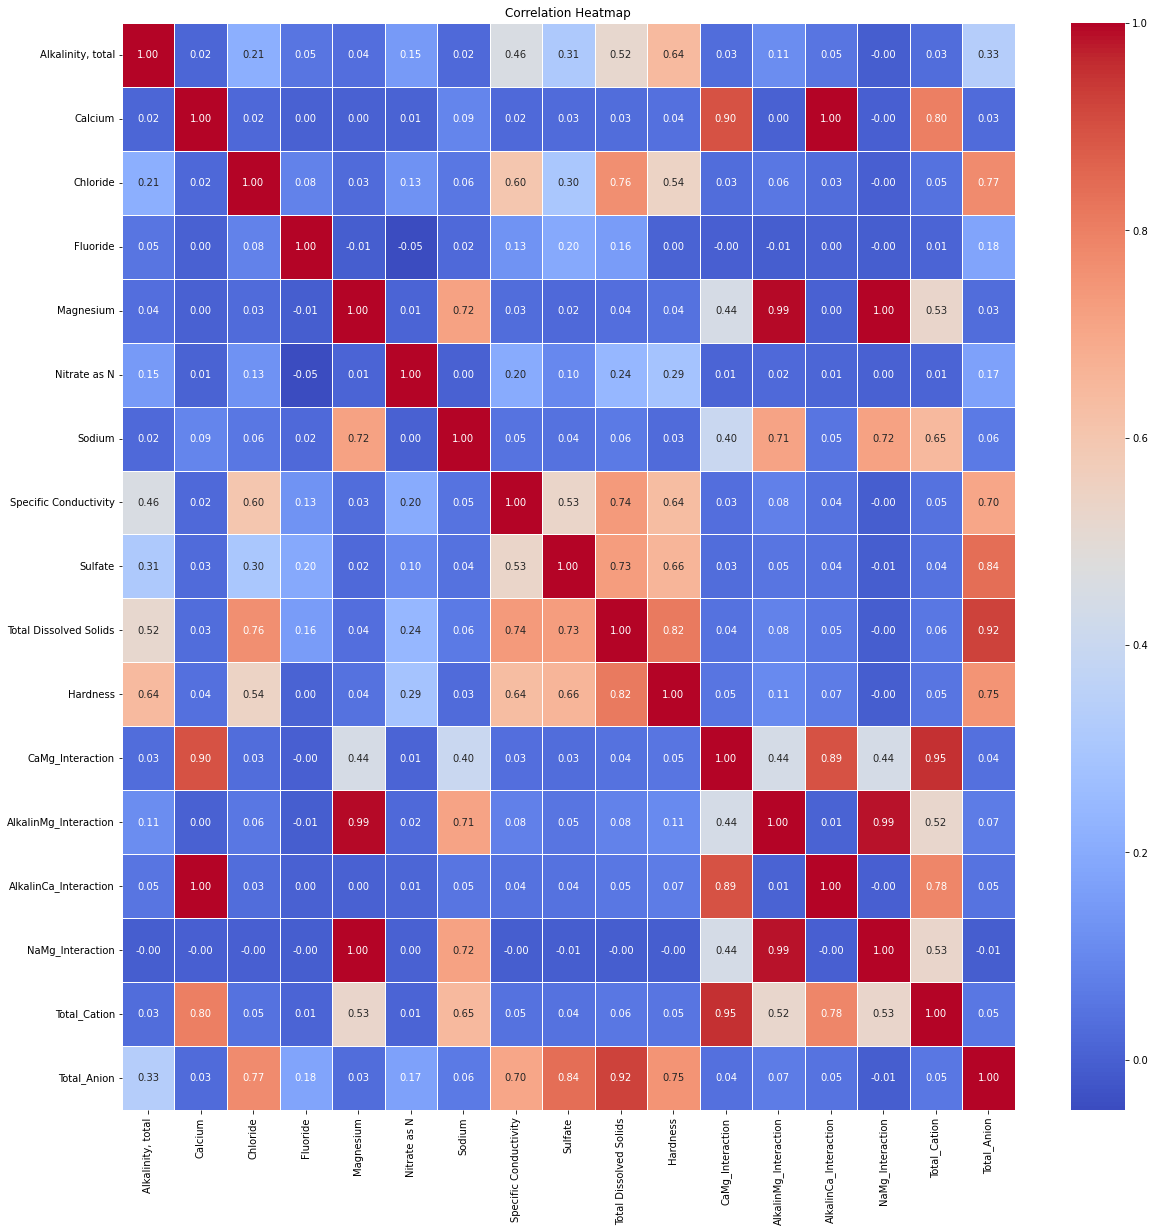

In [15]:
# Calculate the correlation matrix
correlation_matrix = new_train_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
correlation_matrix.loc[round(abs(correlation_matrix["Hardness"]), 2) > 0.0]["Hardness"]

Alkalinity, total         0.639662
Calcium                   0.037651
Chloride                  0.542279
Magnesium                 0.044469
Nitrate as N              0.286936
Sodium                    0.025808
Specific Conductivity     0.635271
Sulfate                   0.658456
Total Dissolved Solids    0.815202
Hardness                  1.000000
CaMg_Interaction          0.053450
AlkalinMg_Interaction     0.106932
AlkalinCa_Interaction     0.067346
Total_Cation              0.049753
Total_Anion               0.752978
Name: Hardness, dtype: float64

In [17]:
final_feat = correlation_matrix.loc[round(abs(correlation_matrix["Hardness"]), 2) > 0]["Hardness"].index.tolist()
final_feat

['Alkalinity, total',
 'Calcium',
 'Chloride',
 'Magnesium',
 'Nitrate as N',
 'Sodium',
 'Specific Conductivity',
 'Sulfate',
 'Total Dissolved Solids',
 'Hardness',
 'CaMg_Interaction',
 'AlkalinMg_Interaction',
 'AlkalinCa_Interaction',
 'Total_Cation',
 'Total_Anion']

In [18]:
clean_train_df = new_train_df[final_feat]

# MODEL CREATION

## Split Feature

In [19]:
X = clean_train_df.drop(columns=['Hardness'])
y = clean_train_df['Hardness']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [20]:
y.describe()

count    6400.000000
mean      216.148203
std       161.431526
min         2.500000
25%       101.000000
50%       180.000000
75%       281.000000
max      1901.000000
Name: Hardness, dtype: float64

## Linear Regression

In [21]:
# Scale the features
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_train)
y_val_pred = linear_reg.predict(X_val)

In [22]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train, y_pred)
print(r2)

0.9146245107098521


## Random Forest

In [23]:
best_params = {'n_estimators': 76, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1} 

In [24]:
from sklearn.ensemble import RandomForestRegressor


best_params['random_state'] = 42
random_forest = RandomForestRegressor(**best_params)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_train)

In [25]:
r2 = r2_score(y_train, y_pred)
print(r2)

0.9856952159638049


## KNN

In [26]:
from sklearn import neighbors

rmse_val = [] 
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_val) 
    r2 = r2_score(y_val, y_pred)
    print(r2)

0.7376933025448954
0.7691582381991584
0.7930529307014493
0.7950465189369522
0.7962062553977692
0.7989757309499552
0.8031169382200669
0.8164961808982114
0.8178384281049887
0.8158946367279772
0.8198268945514405
0.8162108795673151
0.8207353858543441
0.8226679261124958
0.8227997278742393
0.8223406619162503
0.8211840808408708
0.8189276098828718
0.8182140036563648
0.8168400528981076


In [27]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 5)

knn.fit(X_train, y_train) 
y_pred = knn.predict(X_val) 
r2 = r2_score(y_val, y_pred)

In [ ]:
from sklearn.ensemble import BaggingRegressor

bag_knn = BaggingRegressor(estimator=knn, n_estimators=75, random_state=42)

bag_knn.fit(X_train, y_train)

# Predict with bagged
y_predtrain_bag_knn = bag_knn.predict(X_train)
y_predval_bag_knn = bag_knn.predict(X_val)
r2train_bag_knn = r2_score(y_train, y_predtrain_bag_knn)
r2val_bag_knn = r2_score(y_val, y_predval_bag_knn)
print(f"bag_knn r2 train =  {r2train_bag_knn}, bag_knn r2 val = {r2val_bag_knn}, bag_knn r2 diff = {r2train_bag_knn-r2val_bag_knn}")

bag_knn r2 train =  0.8271660845740596, bag_knn r2 val = 0.7242255642250341, bag_knn r2 diff = 0.10294052034902546


## XGB

In [ ]:
import xgboost as xgb

xgb_r = xgb.XGBRegressor(n_estimators=25, 
                         objective="reg:squarederror", 
                         eval_metric="rmse",
                         early_stopping_rounds=2, 
                         learning_rate=0.2, 
                         random_state=0)

xgb_r.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_val, y_val)],
          verbose=5)

[0]	validation_0-rmse:86.32703	validation_1-rmse:86.23680
[5]	validation_0-rmse:37.55351	validation_1-rmse:42.34357


[10]	validation_0-rmse:24.95559	validation_1-rmse:33.35731
[15]	validation_0-rmse:21.80386	validation_1-rmse:32.06791
[20]	validation_0-rmse:20.61758	validation_1-rmse:31.93455
[23]	validation_0-rmse:20.18456	validation_1-rmse:31.83606


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=2,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=25, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [ ]:
y_pred = xgb_r.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9290308494441567


## CATBOOST

In [ ]:
import catboost

cboost = catboost.CatBoostRegressor(n_estimators=150, learning_rate=0.5, random_state=42)
cboost.fit(X_train, y_train)

0:	learn: 101.9714073	total: 3.96ms	remaining: 590ms
1:	learn: 73.2535272	total: 8.11ms	remaining: 600ms
2:	learn: 59.4741773	total: 11.3ms	remaining: 553ms
3:	learn: 52.9997630	total: 14.9ms	remaining: 546ms
4:	learn: 49.9843181	total: 19.3ms	remaining: 560ms
5:	learn: 48.7316391	total: 23.6ms	remaining: 566ms
6:	learn: 47.1447906	total: 27.6ms	remaining: 564ms
7:	learn: 46.7184586	total: 31ms	remaining: 550ms
8:	learn: 45.9344175	total: 34.5ms	remaining: 541ms
9:	learn: 45.1600040	total: 39.9ms	remaining: 558ms
10:	learn: 44.4973238	total: 44.5ms	remaining: 562ms
11:	learn: 43.6791000	total: 47.6ms	remaining: 548ms
12:	learn: 43.3343812	total: 51.3ms	remaining: 541ms
13:	learn: 43.0201231	total: 55.1ms	remaining: 535ms
14:	learn: 42.6963896	total: 59.9ms	remaining: 539ms
15:	learn: 42.2646280	total: 63.8ms	remaining: 535ms
16:	learn: 41.7402482	total: 67.4ms	remaining: 527ms
17:	learn: 41.3835943	total: 70.8ms	remaining: 519ms
18:	learn: 40.8503294	total: 75.6ms	remaining: 521ms
19:	

## STACK: RF, XGBR

In [ ]:
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

xgb = XGBRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

stacking_regressor_rf_xgb = StackingCVRegressor(regressors=(rf, xgb),
                            meta_regressor=xgb, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stacking_regressor_rf_xgb.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate...
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=42, ...)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [ ]:
new_stack = StackingCVRegressor(regressors=(rf, cboost, xgb),
                            meta_regressor=xgb, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

new_stack.fit(X_train, y_train)

0:	learn: 99.2009902	total: 3.51ms	remaining: 523ms
1:	learn: 68.1801247	total: 6.42ms	remaining: 475ms
2:	learn: 54.5537303	total: 8.92ms	remaining: 437ms
3:	learn: 48.8408262	total: 11.5ms	remaining: 418ms
4:	learn: 46.3578138	total: 14.2ms	remaining: 411ms
5:	learn: 44.8439986	total: 16.8ms	remaining: 403ms
6:	learn: 43.2858160	total: 19.5ms	remaining: 399ms
7:	learn: 42.5774651	total: 22.4ms	remaining: 397ms
8:	learn: 42.0218790	total: 25.3ms	remaining: 396ms
9:	learn: 41.7829242	total: 28.3ms	remaining: 397ms
10:	learn: 41.0723947	total: 31.1ms	remaining: 394ms
11:	learn: 40.7209575	total: 33.7ms	remaining: 388ms
12:	learn: 40.2891839	total: 35.7ms	remaining: 377ms
13:	learn: 39.6034842	total: 37.9ms	remaining: 368ms
14:	learn: 38.9779038	total: 40.5ms	remaining: 365ms
15:	learn: 38.8732582	total: 42.5ms	remaining: 356ms
16:	learn: 38.5395766	total: 45.2ms	remaining: 353ms
17:	learn: 37.8397083	total: 48.1ms	remaining: 353ms
18:	learn: 37.2041199	total: 50.2ms	remaining: 346ms
19:

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate...
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=42, ...)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [ ]:
y_pred = stacking_regressor_rf_xgb.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9195925839613383


c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor

new_bag_stack = BaggingRegressor(estimator=new_stack, n_estimators=20, random_state=42)

new_bag_stack.fit(X_train, y_train)

# Predict with bagged
y_predtrain_new_bag_stack = new_bag_stack.predict(X_train)
y_predval_new_bag_stack = new_bag_stack.predict(X_val)
r2train_new_bag_stack = r2_score(y_train, y_predtrain_new_bag_stack)
r2val_new_bag_stack = r2_score(y_val, y_predval_new_bag_stack)
print(f"new_bag_stack r2 train =  {r2train_new_bag_stack}, new_bag_stack r2 val = {r2val_new_bag_stack}, new_bag_stack r2 diff = {r2train_new_bag_stack-r2val_new_bag_stack}")

# this is best if no data prep, takes 7m 40s to train

0:	learn: 103.8264310	total: 2.63ms	remaining: 391ms
1:	learn: 71.3989613	total: 5.21ms	remaining: 386ms
2:	learn: 58.2372630	total: 7.67ms	remaining: 376ms
3:	learn: 50.7073163	total: 9.99ms	remaining: 365ms
4:	learn: 47.5274658	total: 12.7ms	remaining: 369ms
5:	learn: 45.0097658	total: 15.4ms	remaining: 369ms
6:	learn: 43.2421428	total: 18.5ms	remaining: 377ms
7:	learn: 41.7169106	total: 20.7ms	remaining: 367ms
8:	learn: 40.9021224	total: 23ms	remaining: 360ms
9:	learn: 39.8370081	total: 26.2ms	remaining: 367ms
10:	learn: 39.1035549	total: 28.3ms	remaining: 358ms
11:	learn: 38.1214448	total: 31.7ms	remaining: 364ms
12:	learn: 37.3568081	total: 33.8ms	remaining: 356ms
13:	learn: 36.5856816	total: 36.5ms	remaining: 355ms
14:	learn: 36.3099565	total: 38.9ms	remaining: 350ms
15:	learn: 35.5948289	total: 41.8ms	remaining: 350ms
16:	learn: 35.0052227	total: 44.7ms	remaining: 350ms
17:	learn: 34.7627240	total: 47.8ms	remaining: 351ms
18:	learn: 33.8385337	total: 50.5ms	remaining: 348ms
19:	

# SUBMISSION

In [ ]:
X.columns

Index(['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium',
       'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate',
       'Total Dissolved Solids'],
      dtype='object')

In [ ]:
X_train.columns

Index(['Alkalinity, total', 'Calcium', 'Chloride', 'Magnesium', 'Nitrate as N',
       'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids',
       'CaMg_Interaction', 'AlkalinMg_Interaction', 'AlkalinCa_Interaction',
       'Total_Cation', 'Total_Anion'],
      dtype='object')

In [ ]:
new_test_df = feat_eng(test_df)

In [ ]:
test_pred = new_bag_stack.predict(new_test_df[X.columns])
predicting_model = "new_bag_stack"

submission_df = pd.DataFrame(new_test_df["id"])
submission_df["Hardness"] = test_pred

submission_df

,id,Hardness
0,6400,88.374939
1,6401,138.739212
2,6402,112.944778
3,6403,102.164665
4,6404,320.214966
...,...,...
1596,7996,87.142197
1597,7997,53.700478
1598,7998,200.052887
1599,7999,246.605225


In [ ]:
from datetime import datetime
submission_df.to_csv(("submission-" + predicting_model + datetime.now().strftime("-%Y %m %d_%Hh %Mm %Ss") + ".csv") , index=False)

# Research Questions

## Q1: Dalam konteks bisnis dan ilmiah, apakah memprediksi nilai kesadahan (Hardness) air tanah merupakan hal yang mendesak? Jelaskan urgensinya!


Dalam konteks bisnis, menganalisis kesadahan (Hardness) air merupakan hal yang mendesak untuk diprediksi tergantung dengan jenis bisnis yang dijalani. Memprediksi kesadahan air merupakan hal yang mendesak jika bisnis yang dijalankan merupakan bisnis yang menggunakan air tanah sebagai primary activities maupun support activities. Tingkat kesadahan air memiliki urgensi yang tinggi saat air tanah digunakan sebagai proses bisnis utama, seperti pengolahan air maupun dalam proses yang mendukung bisnis yang dijalankan, seperti penggunaan air tanah dalam produksi produk/jasa. Hal ini memiliki urgensi yang tinggi karena, dengan air tanah yang memiliki kesadahan yang tinggi, produk/jasa yang disediakan akan menghasilkan kualitas yang lebih rendah, infrastruktur dalam proses produksi dapat rusak, bahkan dapat mengurangi tingkat kepercayaan investor dalam berinvestasi dalam bisnis yang dijalankan. Beberapa urgensi tersebut dapat dibuktikan dengan kandungan sodium dan magnesium yang sejalan dengan tingkat kesadahan air. Dengan kandungan sodium dan magnesium yang tinggi,  jika air tanah tersebut digunakan dalam produksi, maka kandungan tersebut dapat merusak peralatan yang digunakan untuk proses produksi.

Dalam konteks ilmiah, menganalisis kesadahan (Hardness) air merupakan hal yang mendesak untuk diprediksi. Hal ini dikarenakan kesadahan air yang menunjukkan zat-zat kimia yang membahayakan kesehatan. Dengan prediksi akan kesadahan air, ilmuan dapat melakukan studi yang lebih mendalam tentang bagaimana kesadahan air memengaruhi perilaku dan mobilitas zat-zat kimia yang ada dalam air tanah, pengaruh perubahan iklim terhadap kesadahan air tanah, dan penelitian - penelitian lebih lanjut tentang pengaruh kesadahan air terhadap lingkungan.

## Q2: Apakah submisi Kaggle Anda mengalami *overfit* atau *underfit*? Jika iya, jelaskan mengapa submisi tersebut Anda anggap sebagai *overfit* atau *underfit* serta jelaskan bagaimana cara mengatasi hal tersebut! Jika tidak, jelaskan mengapa!

Submisi Kaggle kami mengalami sedikit *overfit* karena jika dilihat, nilai R2 dari model new_bag_stack pada data train dan validation berturut-turut adalah 0.97 dan 0.92 artinya ada penurunan skor pada validasi. Begitu pula pada leaderboard kaggle, ternyata skornya hanya mencapai 0.90. Dari fenomena ini bisa disimpulkan bahwa model berperforma lebih baik pada training set dan kurang baik di test set. Untuk mengatasi hal ini bisa dilakukan pruning atau pemangkasan terhadap fitur-fitur pemodelan agar model tidak terlalu banyak mempelajari *noise* yang khas dari training set, kemudian bisa juga melalui augmentasi data untuk memperbanyak data latih agar model menjadi lebih general, atau terakhir bisa melalui regularisasi yaitu pemberian penalti pada saat pelatihan model.

Sumber: [AWS](https://aws.amazon.com/what-is/overfitting/) ; [EliteDataScience](https://elitedatascience.com/overfitting-in-machine-learning#how-to-prevent)

## Q3: Jawablah pertanyaan-pertanyaan statistik berikut:

### a. Berapa Hardness rata-rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaan (Alkalinity) di atas rata-rata?

In [29]:
train_df.loc[(train_df["Sodium"] > train_df["Sodium"].quantile(0.75)) & (train_df["Alkalinity, total"] > train_df["Alkalinity, total"].mean())]["Hardness"].mean()

383.0833134765625

Rata-rata hardness: 383,0833

### b. Apakah ada sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dapat dianggap outlier? Jelaskan!

{'whiskers': [<matplotlib.lines.Line2D at 0x18339050910>,
 'caps': [<matplotlib.lines.Line2D at 0x18339050e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x18339050670>],
 'medians': [<matplotlib.lines.Line2D at 0x18339051390>],
 'fliers': [<matplotlib.lines.Line2D at 0x18339051630>],
 'means': []}

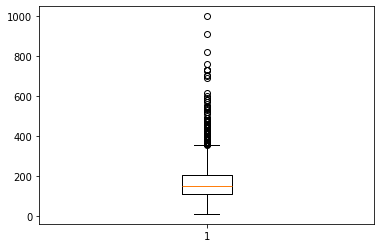

In [30]:
plt.boxplot(train_df["Alkalinity, total"])

In [48]:
def percentage_outliers_iqr(df):
    outliers_dict = {}
    total_outliers = 0
    total_data_points = df.shape[0] * df.select_dtypes(include=['float64', 'int64']).shape[1]
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        total_outliers += outliers
        total = len(df[column])
        percentage = (outliers / total) * 100
        outliers_dict[column] = (outliers, percentage)
        overall_percentage = total_outliers/total_data_points * 100
    return (outliers_dict, overall_percentage)

In [51]:
print(train_df["Alkalinity, total"].quantile(0.25))
print(train_df["Alkalinity, total"].quantile(0.75))

110.0
209.0


In [50]:
outliers_percentage = percentage_outliers_iqr(train_df)
print(outliers_percentage[0]["Alkalinity, total"])

(174, 2.71875)


Outlier kebasaan: 174 baris data merupakan outlier dihitung menggunakan aturan 1.5 IQR. Q1 dan Q3 dari kolom kebasaan berturut-turut adalah 110 dan 209. Dari sini ditetapkan IQR = Q3-Q1 = 99, maka batas bawah dan batas atas untuk toleransi bagi outlier berturut-turut -38.5 dan 357.5. Maka baris data yang memiliki nilai kebasaan di luar rentang tersebut akan dideteksi sebagai outlier.

Sumber: [Khan Academy](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule) ; [Penn State Eberly College of Science](https://online.stat.psu.edu/stat200/lesson/3/3.2#:~:text=Any%20observations%20that%20are%20more,above%20Q3%20are%20considered%20outliers.)

## Q4: Apakah ada hubungan antara Specific Conductivity dan Hardness? Jelaskan!


In [33]:
correlation = train_df["Specific Conductivity"].corr(train_df["Hardness"])
print(f"Koefisien Korelasi Pearson: {correlation}")

Koefisien Korelasi Pearson: 0.6352710459414744


Ya, ada hubungan korelasi positif antara specific conductivity dan hardness dilihat dari nilai korelasi pearson antara kedua kolom. Korelasi pearson dihitung menggunakan rumus koefisien korelasi Pearson sebagai berikut: (BISA MASUKKIN FOTO GAKKK ATO RUMUS)

Nilai pada korelasi pearson berada di rentang -1 sampai 1 di mana semakin dekat ke -1 berarti korelasi semakin negatif, semakin dekat ke 1 maka korelasi semakin positif, dan semakin dekat ke 0 maka semakin tidak ada korelasi.
Pada set data ini, nilai korelasi pearson antara specific conductivity dan hardness adalah 0,64 


## Q5: Dari zat-zat kimia yang diberikan, zat-zat apa saja yang paling mempengaruhi dan paling tidak mempengaruhi Hardness? Jelaskan!


Untuk menunjukkan pengaruh suatu zat kimia terhadap Hardness, kita dapat menggunakan correlation matrix dengan code sebagai berikut:

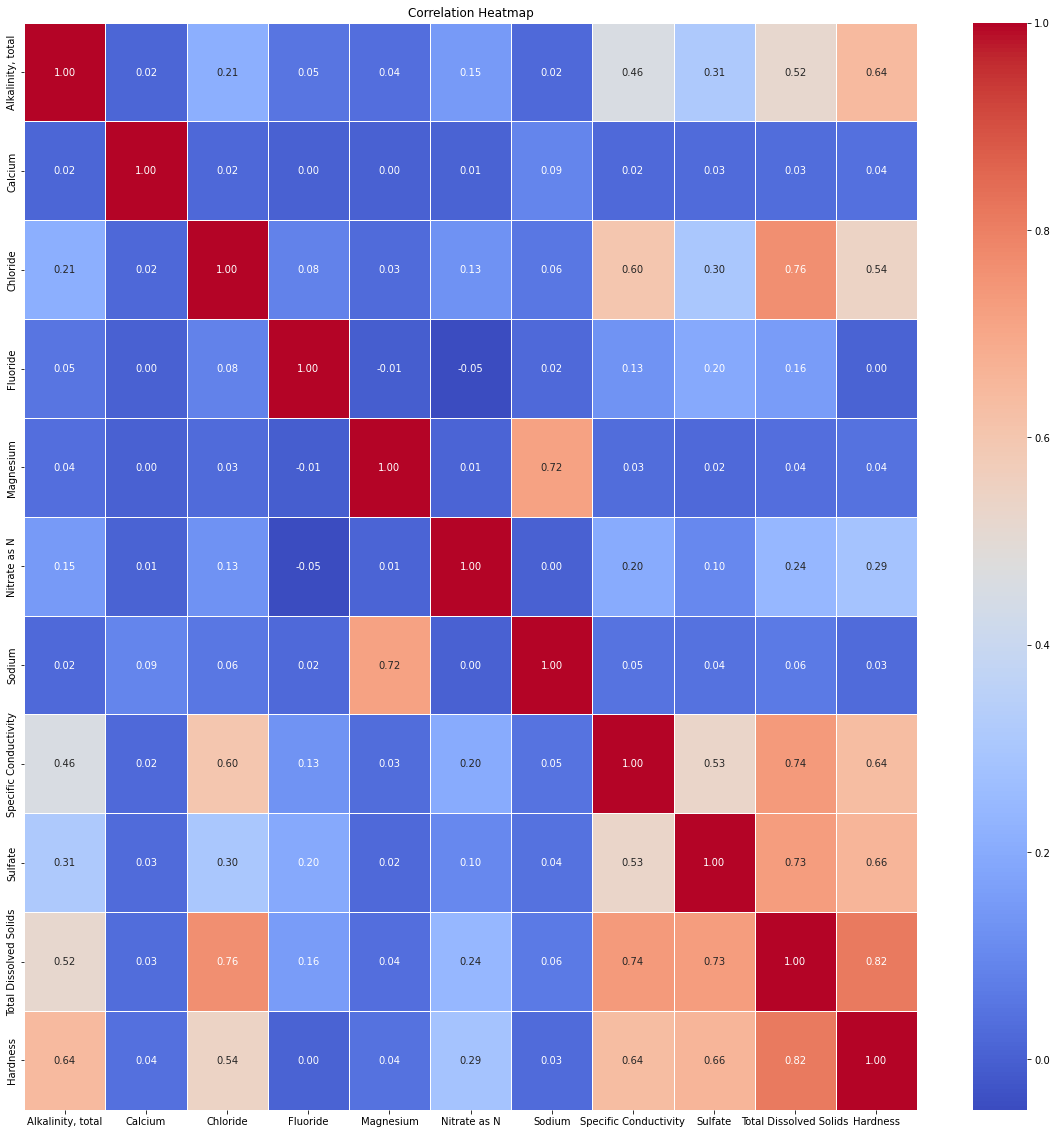

In [34]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Berdasarkan correlation matrix diatas, zat kimia yang paling memengaruhi tingkat Hardness adalah Sulfat dengan nilai korelasi 0.66 dengan Hardness air. Hal ini menunjukkan bahwa semakin tinggi kandungan sulfat dalam air, maka Hardness air akan cenderung semakin tinggi. Sedangkan kandungan fluor pada suatu air memiliki korelasi 0 dengan Hardness air. Hal ini menunjukkan bahwa kandungan fluor pada air tidak memiliki hubungan sama sekali dengan Hardness air.

## Q6: Apakah ada pasangan zat kimia yang berkorelasi tinggi? Apakah ada efek dari korelasi tersebut?

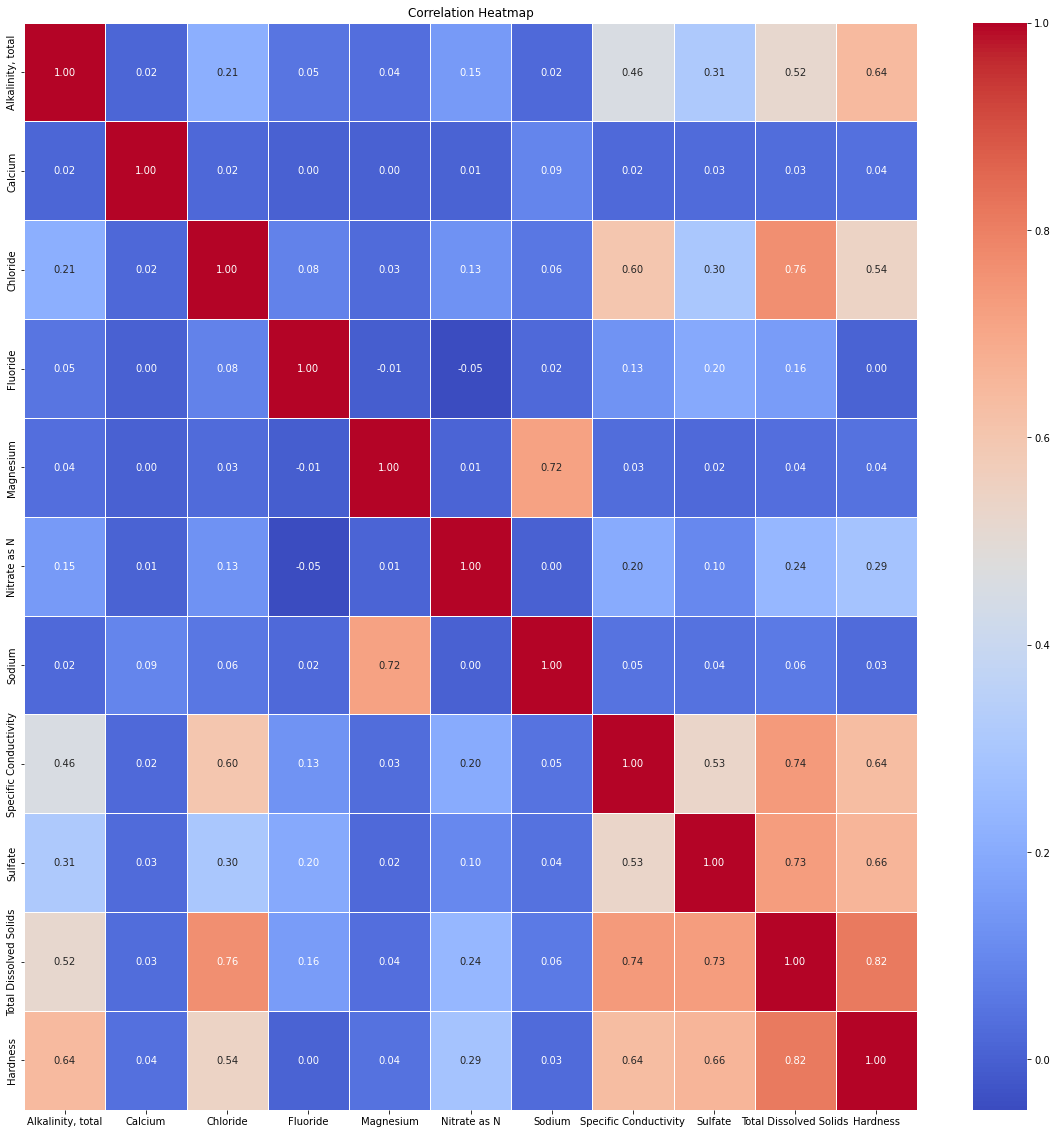

In [35]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Pasangan zat kimia yang berkorelasi cukup tinggi pada train set, berdasarkan heatmap di atas, adalah Sodium dengan Magnesium, Sulfate dengan Chloride, dan Sulfate dengan Fluoride. Efek dari korelasi pasangan-pasangan ini adalah terinspirasinya pembuatan fitur interaksi pada proses feature engineering. Korelasi Sodium dengan Magnesium menginspirasi pembuatan fitur "NaMg_Interaction" serta korelasi Sulfate-Chloride dan Sulfate-Fluoride menginspirasi pembuatan fitur "Total_Anion". Selanjutnya fitur-fitur ini membantu dalam pemodelan.

## Q7: Jelaskan fitur baru apa saja yang anda peroleh untuk membantu kemampuan model dalam memprediksi ketika anda melalui proses feature engineering

Ada 6 fitur yang diperoleh untuk membantu model memprediksi dalam proses feature engineering, yaitu:
1. "CaMg_Interaction": interaksi calcium dan magnesium yang diperoleh dari rumus 2.5Ca + 4Mg
2. "AlkalinMg_Interaction": interaksi alkalinitas dan magnesium yang diperoleh dengan mengalikan Alkalinity dan Magnesium
3. "AlkalinCa_Interaction": interaksi alkalinitas dan magnesium yang diperoleh dengan mengalikan Alkalinity dan Calcium
4. "NaMg_Interaction": interaksi sodium dan magnesium dengan perkalian keduanya
5. "Total_Cation": jumlah dari semua ion positif (Na, Mg, Ca)
6. "Total_Anion": jumlah dari semua ion negatif (Cl, S, N, F)

Dari ke-6 fitur tersebut, "NaMg_Interaction" tidak digunakan dalam pemodelan karena memiliki korelasi yang rendah dengan target

## Q8: Jelaskan model yang Anda gunakan dalam memprediksi label Hardness! Mengapa Anda menggunakan model tersebut?

Model yang digunakan dalam memprediksi label Hardness adalah model yang menggabungkan teknik stacking dan bagging terhadap model-model berbasis tree. Dalam kasus ini model yang digunakan adalah Random Forest, XGBoost, dan CatBoost. Model-model ini digunakan dalam kasus ini karena karakteristik data yang memiliki outlier dan korelasi linear fitur dengan target yang kecil. Model-model berbasis tree memang lebih tahan terhadap outlier dan bisa menangkap hubungan fitur dengan target yang non-linear. Penerapan stacking dan bagging sendiri dimanfaatkan untuk mengatasi kelemahan model-model tersebut jika berdiri sendiri.

## Q9: Menurut Anda, apakah metrik penilaian R2 tepat? Jika tidak, metrik penilaian apa yang menduurt anda lebih tepat digunakan? Elaborasikan jawaban Anda!

Metrik penilaian R2 dapat menjelaskan variabilitas data dan lebih cocok untuk menjelaskan variabilitas hasil prediksi bila korelasi antar fitur dengan target cenderung linear atau bila digunakan untuk membandingkan performa antar model. Pada kasus ini, data yang digunakan memiliki korelasi linear yang kecil dan mengandung pencilan (termasuk di testing data) yang dapat mengganggu penilaian goodness-of-fit menggunakan R2. Untuk mendapatkan penilaian yang lebih intuitif, metrik yang lebih cocok seharusnya menggunakan sesuatu yang lebih tahan terhadap pencilan dan bisa menilai korelasi non-linear dengan lebih baik. Mean Absolute Error (MAE) dan Mean Absolute Percentage Error (MAPE) merupakan metrik evaluasi yang paling sesuai dan paling mudah dipahami karena pemutlakan membuatnya lebih tahan terhadap pencilan, serta rumus errornya tidak akan peduli dengan korelasi linear maupun non-linear.

Sumber: [Stacked Generalization](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html) ; [Bagging Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)

In [37]:
outliers_percentage = percentage_outliers_iqr(test_df)
print(f"Persentase pencilan di test set menurut aturan 1.5IQR: {round(outliers_percentage[1], 2)}%")

Persentase pencilan di test set menurut aturan 1.5IQR: 5.13%


## Q10: Jika Anda boleh mengambil data dari sumber eksternal, data tentang apa yang Anda akan ambil? Jelaskan mengapa data tersebut dapat membantu Anda memprediksi hardness!

Beberapa faktor untuk memprediksi nilai kesadahan air antara lain:
1. Soap: berapa banyak (tetes) pure liquid soap yang diperlukan sampai air dapat menghasilkan busa. Semakin banyak pure liquid soap yang diperlukan maka semakin sadah juga air yang dites.
2. pH air: semakin asam air (pH rendah) maka kelarutan CaCO3 dan MgCO3 meningkat sehingga air semakin sadah. Semakin asam air, ion bikarbonat juga lebih dominan sehingga kesadahan air meningkat (hal ini terjadi karena ion bikarbonat tidak mudah mengendap seperti ion karbonat.
